# Student grades prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [4]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [5]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

We can see there are null values present in many columns

<Axes: >

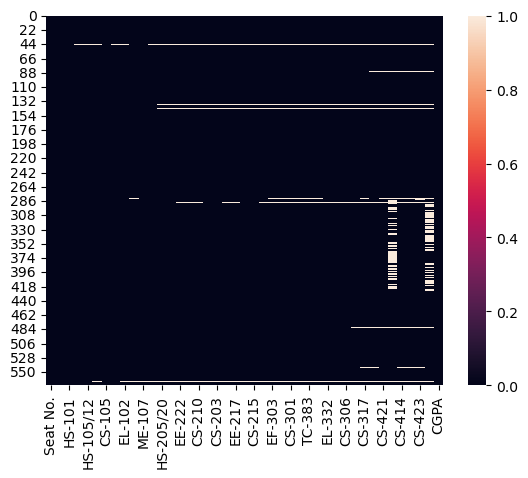

In [10]:
sns.heatmap(df.isnull())

# Handling null values

In [7]:
from sklearn.impute import SimpleImputer
simple_impute=SimpleImputer(strategy='most_frequent')
from sklearn.compose import make_column_transformer

In [8]:
col_transform= make_column_transformer((simple_impute,['CY-105','HS-105/12','MT-111','CS-106','EL-102','EE-119','ME-107','CS-107'
                                                     ,'HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214',
                                                     'EE-217','CS-212','CS-215','MT-331','EF-303','HS-304','CS-301','CS-302','TC-383',
                                                     'MT-442','EL-332','CS-318','CS-306','CS-312','CS-317','CS-403','CS-421','CS-406',
                                                     'CS-414','CS-419','CS-423','CS-412']),remainder='passthrough')

In [9]:
df_new=pd.DataFrame(col_transform.fit_transform(df),columns=['CY-105','HS-105/12','MT-111','CS-106','EL-102','EE-119','ME-107','CS-107'
                                                     ,'HS-205/20','MT-222','EE-222','MT-224','CS-210','CS-211','CS-203','CS-214',
                                                     'EE-217','CS-212','CS-215','MT-331','EF-303','HS-304','CS-301','CS-302','TC-383',
                                                     'MT-442','EL-332','CS-318','CS-306','CS-312','CS-317','CS-403','CS-421','CS-406',
                                                     'CS-414','CS-419','CS-423','CS-412','Seat No.','PH-121','HS-101','CS-105','CGPA'])
df_new

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-406,CS-414,CS-419,CS-423,CS-412,Seat No.,PH-121,HS-101,CS-105,CGPA
0,C-,C,C-,D,C-,B-,C-,C-,B+,D,...,A-,A,C-,B,A-,CS-97001,B-,D+,D+,2.205
1,D+,D,B-,D,A,D+,D,B+,C+,B-,...,A-,B-,C,C,B,CS-97002,A,D,C,2.008
2,A,B-,B+,B-,B+,A-,A-,B-,A-,A,...,A,A,A,A-,A,CS-97003,A,B,A,3.608
3,D+,D,D,D+,C-,D,C+,D,B,D+,...,B-,B,C+,C+,C+,CS-97004,D,C+,A-,1.906
4,A-,B+,A,A-,B+,A,A-,C,A,A,...,A-,A,A-,A-,A,CS-97005,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,A,A-,A+,A-,A-,A+,B+,A+,A,A+,...,A,B+,B+,B,A,CS-97567,B,A,A,3.798
567,A,A,A,A,A-,A,A,A+,B+,C+,...,A-,B,A-,C,A-,CS-97568,A+,A,A,3.772
568,A-,B+,A,A,A,A,B,A+,B-,B,...,A,C,B+,A-,A-,CS-97569,B,A,A,3.47
569,D,A,D,B-,C-,B-,C-,A+,C+,D,...,D,C,B,B-,C,CS-97570,A,B+,D+,2.193


In [11]:
df_new.isnull().sum()

CY-105       0
HS-105/12    0
MT-111       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
Seat No.     0
PH-121       0
HS-101       0
CS-105       0
CGPA         0
dtype: int64

In [12]:
#checking duplicate values
df_new.duplicated().sum()

0

# Statistical summary

In [13]:
df_new.describe()

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-406,CS-414,CS-419,CS-423,CS-412,Seat No.,PH-121,HS-101,CS-105,CGPA
count,571,571,571,571,571,571,571,571,571,571,...,571,571,571,571,571,571,571,571,571,571.000
unique,13,13,13,13,13,12,13,14,13,14,...,14,13,12,12,13,571,13,12,11,491.000
top,A,A,A-,A-,A-,A-,A-,A,A-,A-,...,A-,A,A-,A-,A-,CS-97001,A-,A-,A,3.019
freq,178,97,107,118,107,139,81,107,155,91,...,262,189,133,136,236,1,112,82,151,5.000


# Exploratory data analysis (EDA)

In [14]:
#droping column seat number
df_new=df_new.drop(['Seat No.'],axis=1)
df_new

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,PH-121,HS-101,CS-105,CGPA
0,C-,C,C-,D,C-,B-,C-,C-,B+,D,...,C-,A-,A,C-,B,A-,B-,D+,D+,2.205
1,D+,D,B-,D,A,D+,D,B+,C+,B-,...,D,A-,B-,C,C,B,A,D,C,2.008
2,A,B-,B+,B-,B+,A-,A-,B-,A-,A,...,C,A,A,A,A-,A,A,B,A,3.608
3,D+,D,D,D+,C-,D,C+,D,B,D+,...,C-,B-,B,C+,C+,C+,D,C+,A-,1.906
4,A-,B+,A,A-,B+,A,A-,C,A,A,...,B-,A-,A,A-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,A,A-,A+,A-,A-,A+,B+,A+,A,A+,...,A,A,B+,B+,B,A,B,A,A,3.798
567,A,A,A,A,A-,A,A,A+,B+,C+,...,A,A-,B,A-,C,A-,A+,A,A,3.772
568,A-,B+,A,A,A,A,B,A+,B-,B,...,B+,A,C,B+,A-,A-,B,A,A,3.47
569,D,A,D,B-,C-,B-,C-,A+,C+,D,...,C-,D,C,B,B-,C,A,B+,D+,2.193


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
for i in df_new.columns:
    if(df_new[i].dtypes=='object'):
        df_new[i]=le.fit_transform(df_new[i].values.reshape(-1,1))

In [19]:
df_new

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,PH-121,HS-101,CS-105,CGPA
0,8,6,8,9,8,5,8,8,4,9,...,8,2,0,8,3,2,5,10,10,72
1,10,9,5,9,0,10,9,4,7,5,...,9,2,5,6,6,3,0,9,6,48
2,0,5,4,5,4,2,2,5,2,0,...,6,0,0,0,2,0,0,3,0,409
3,10,9,9,10,8,9,7,9,3,10,...,8,5,3,7,7,7,9,7,2,33
4,2,4,0,2,4,0,2,6,0,0,...,5,2,0,2,2,0,2,2,0,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0,2,1,2,2,1,4,1,0,1,...,0,0,4,4,3,0,3,0,0,459
567,0,0,0,0,2,0,0,1,4,7,...,0,2,3,2,6,2,1,0,0,457
568,2,4,0,0,0,0,3,1,5,3,...,4,0,6,4,2,2,3,0,0,369
569,9,0,9,5,8,5,8,1,7,9,...,8,9,6,3,5,6,0,4,10,70


# Checking for skewness

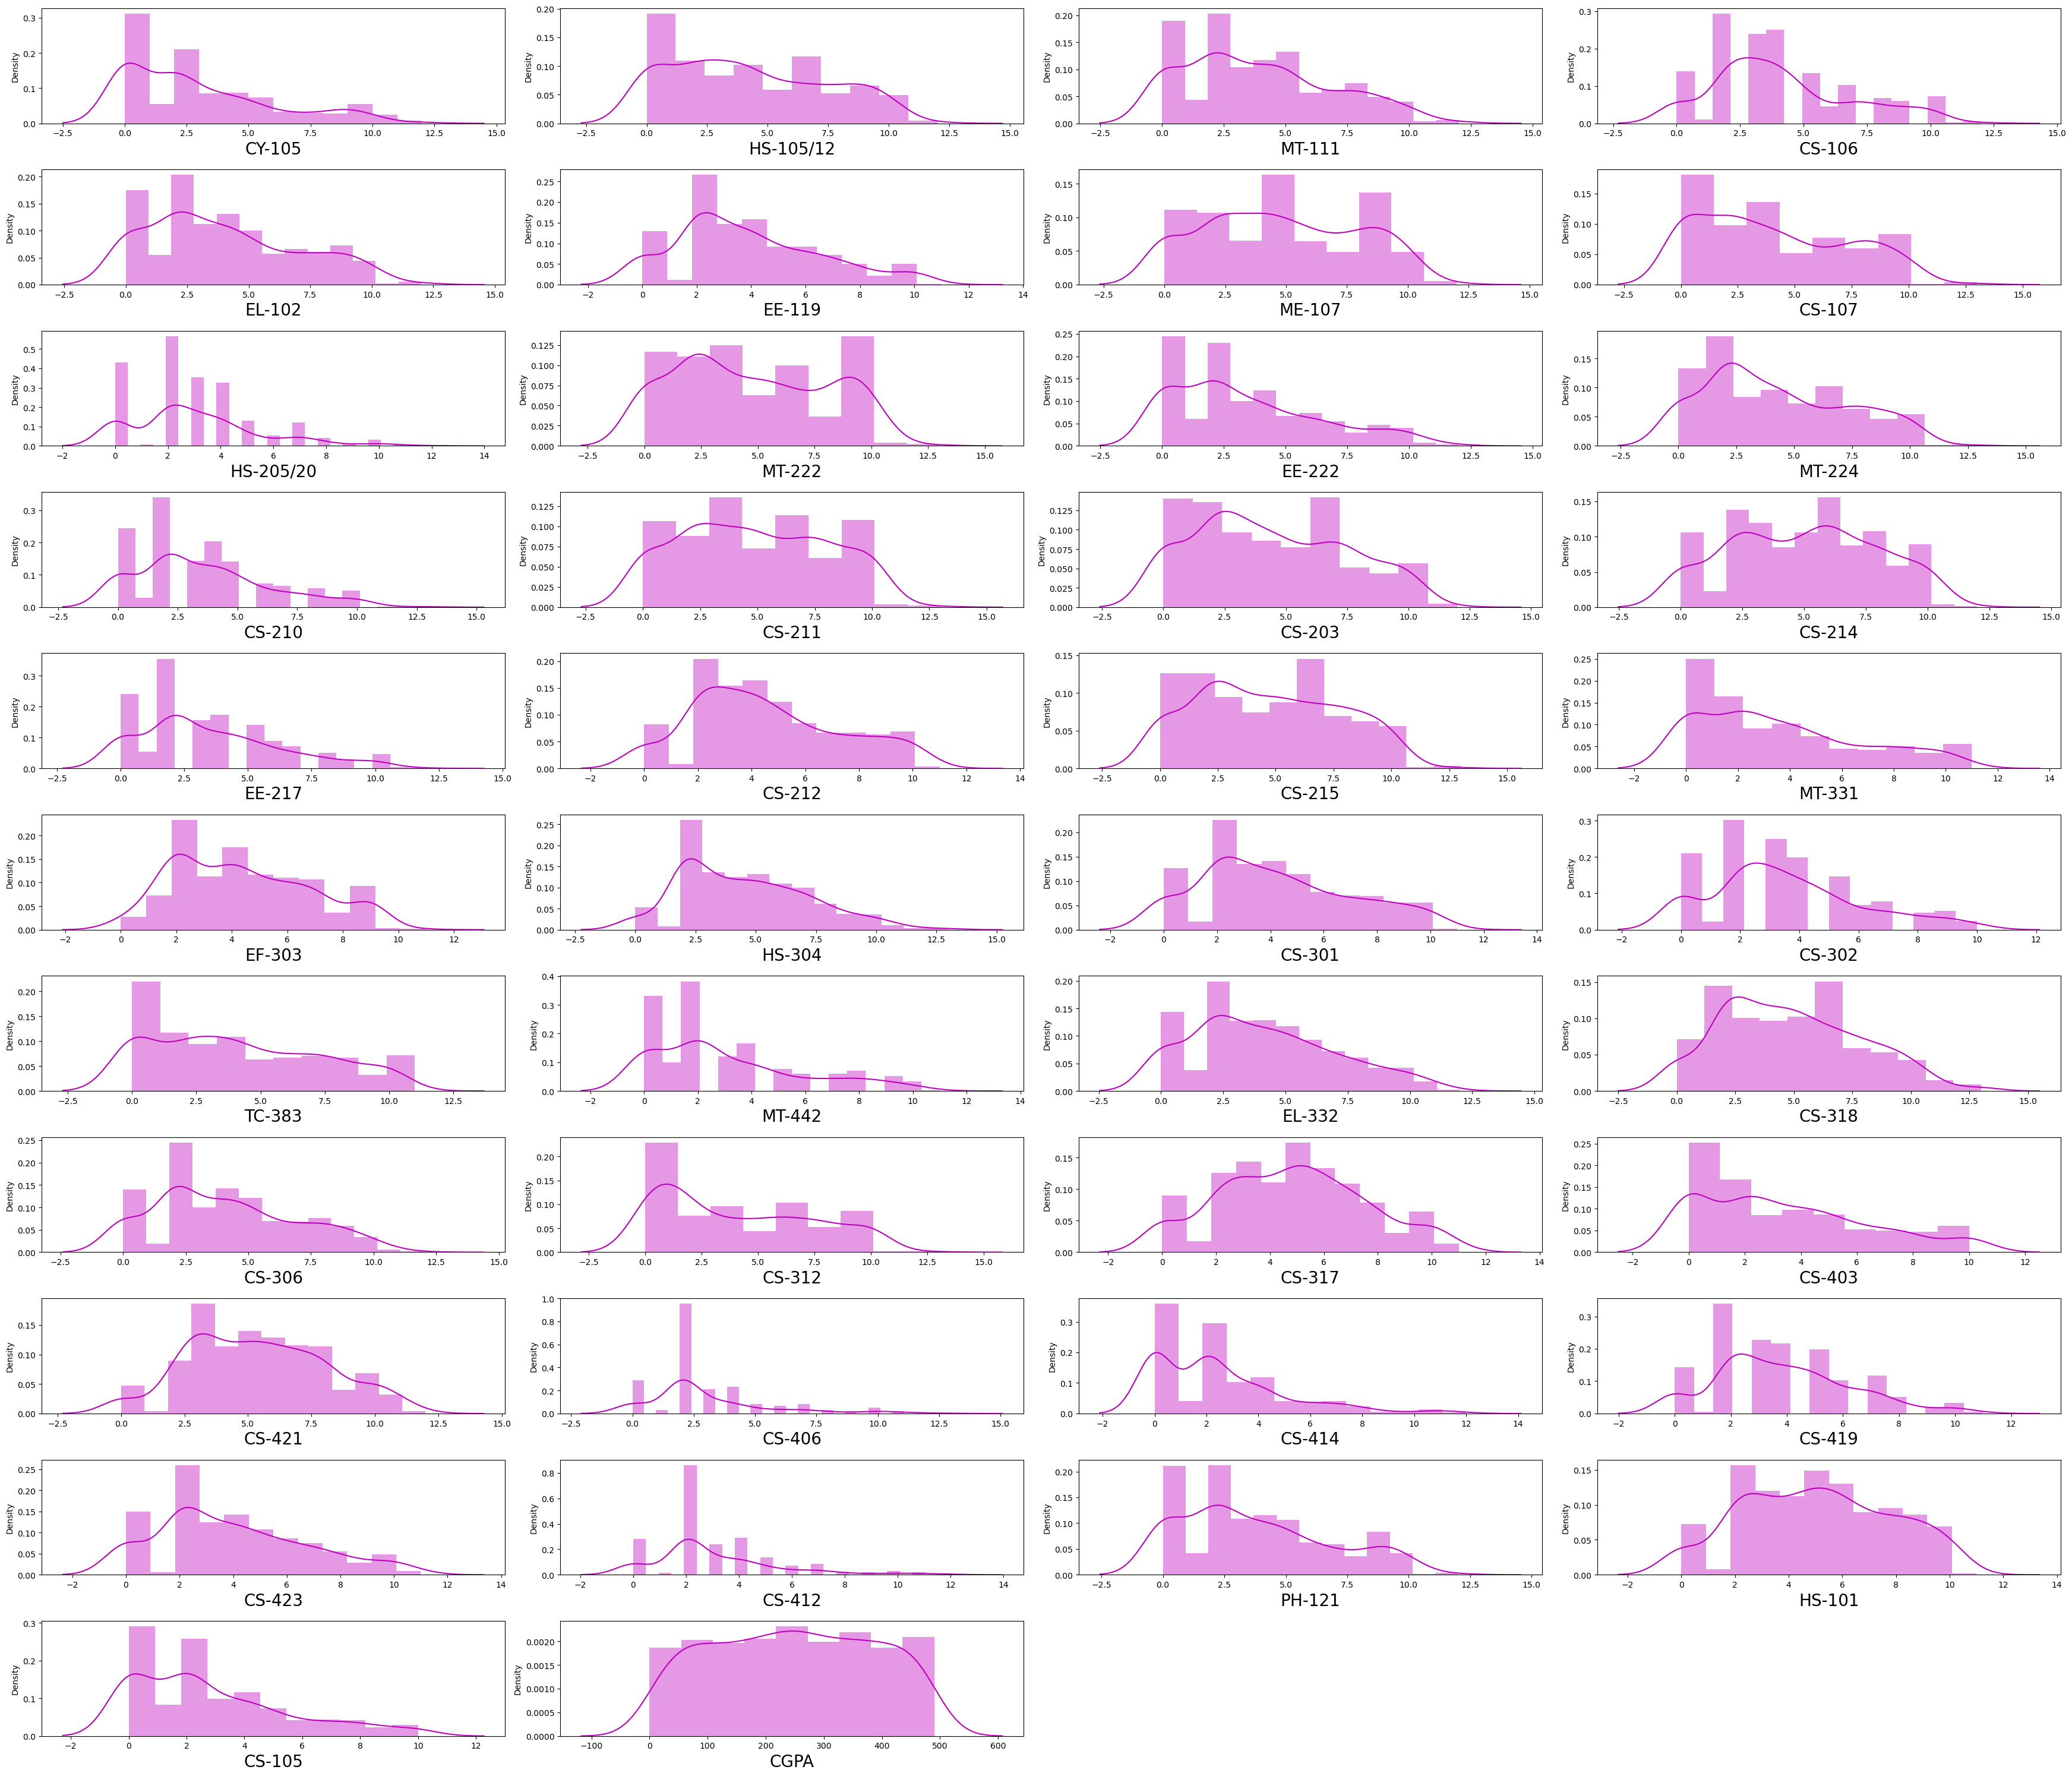

In [21]:
plt.figure(figsize=(35,30), facecolor='white')
plotnumber=1
for col in df_new:
    if plotnumber<=42:
        ax=plt.subplot(11,4,plotnumber)
        sns.distplot(df_new[col], color='m')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()    
plt.show()    

In [22]:
df_new.skew()

CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
PH-121       0.549104
HS-101       0.053303
CS-105       0.930769
CGPA        -0.012061
dtype: float64

# Checking for outliers

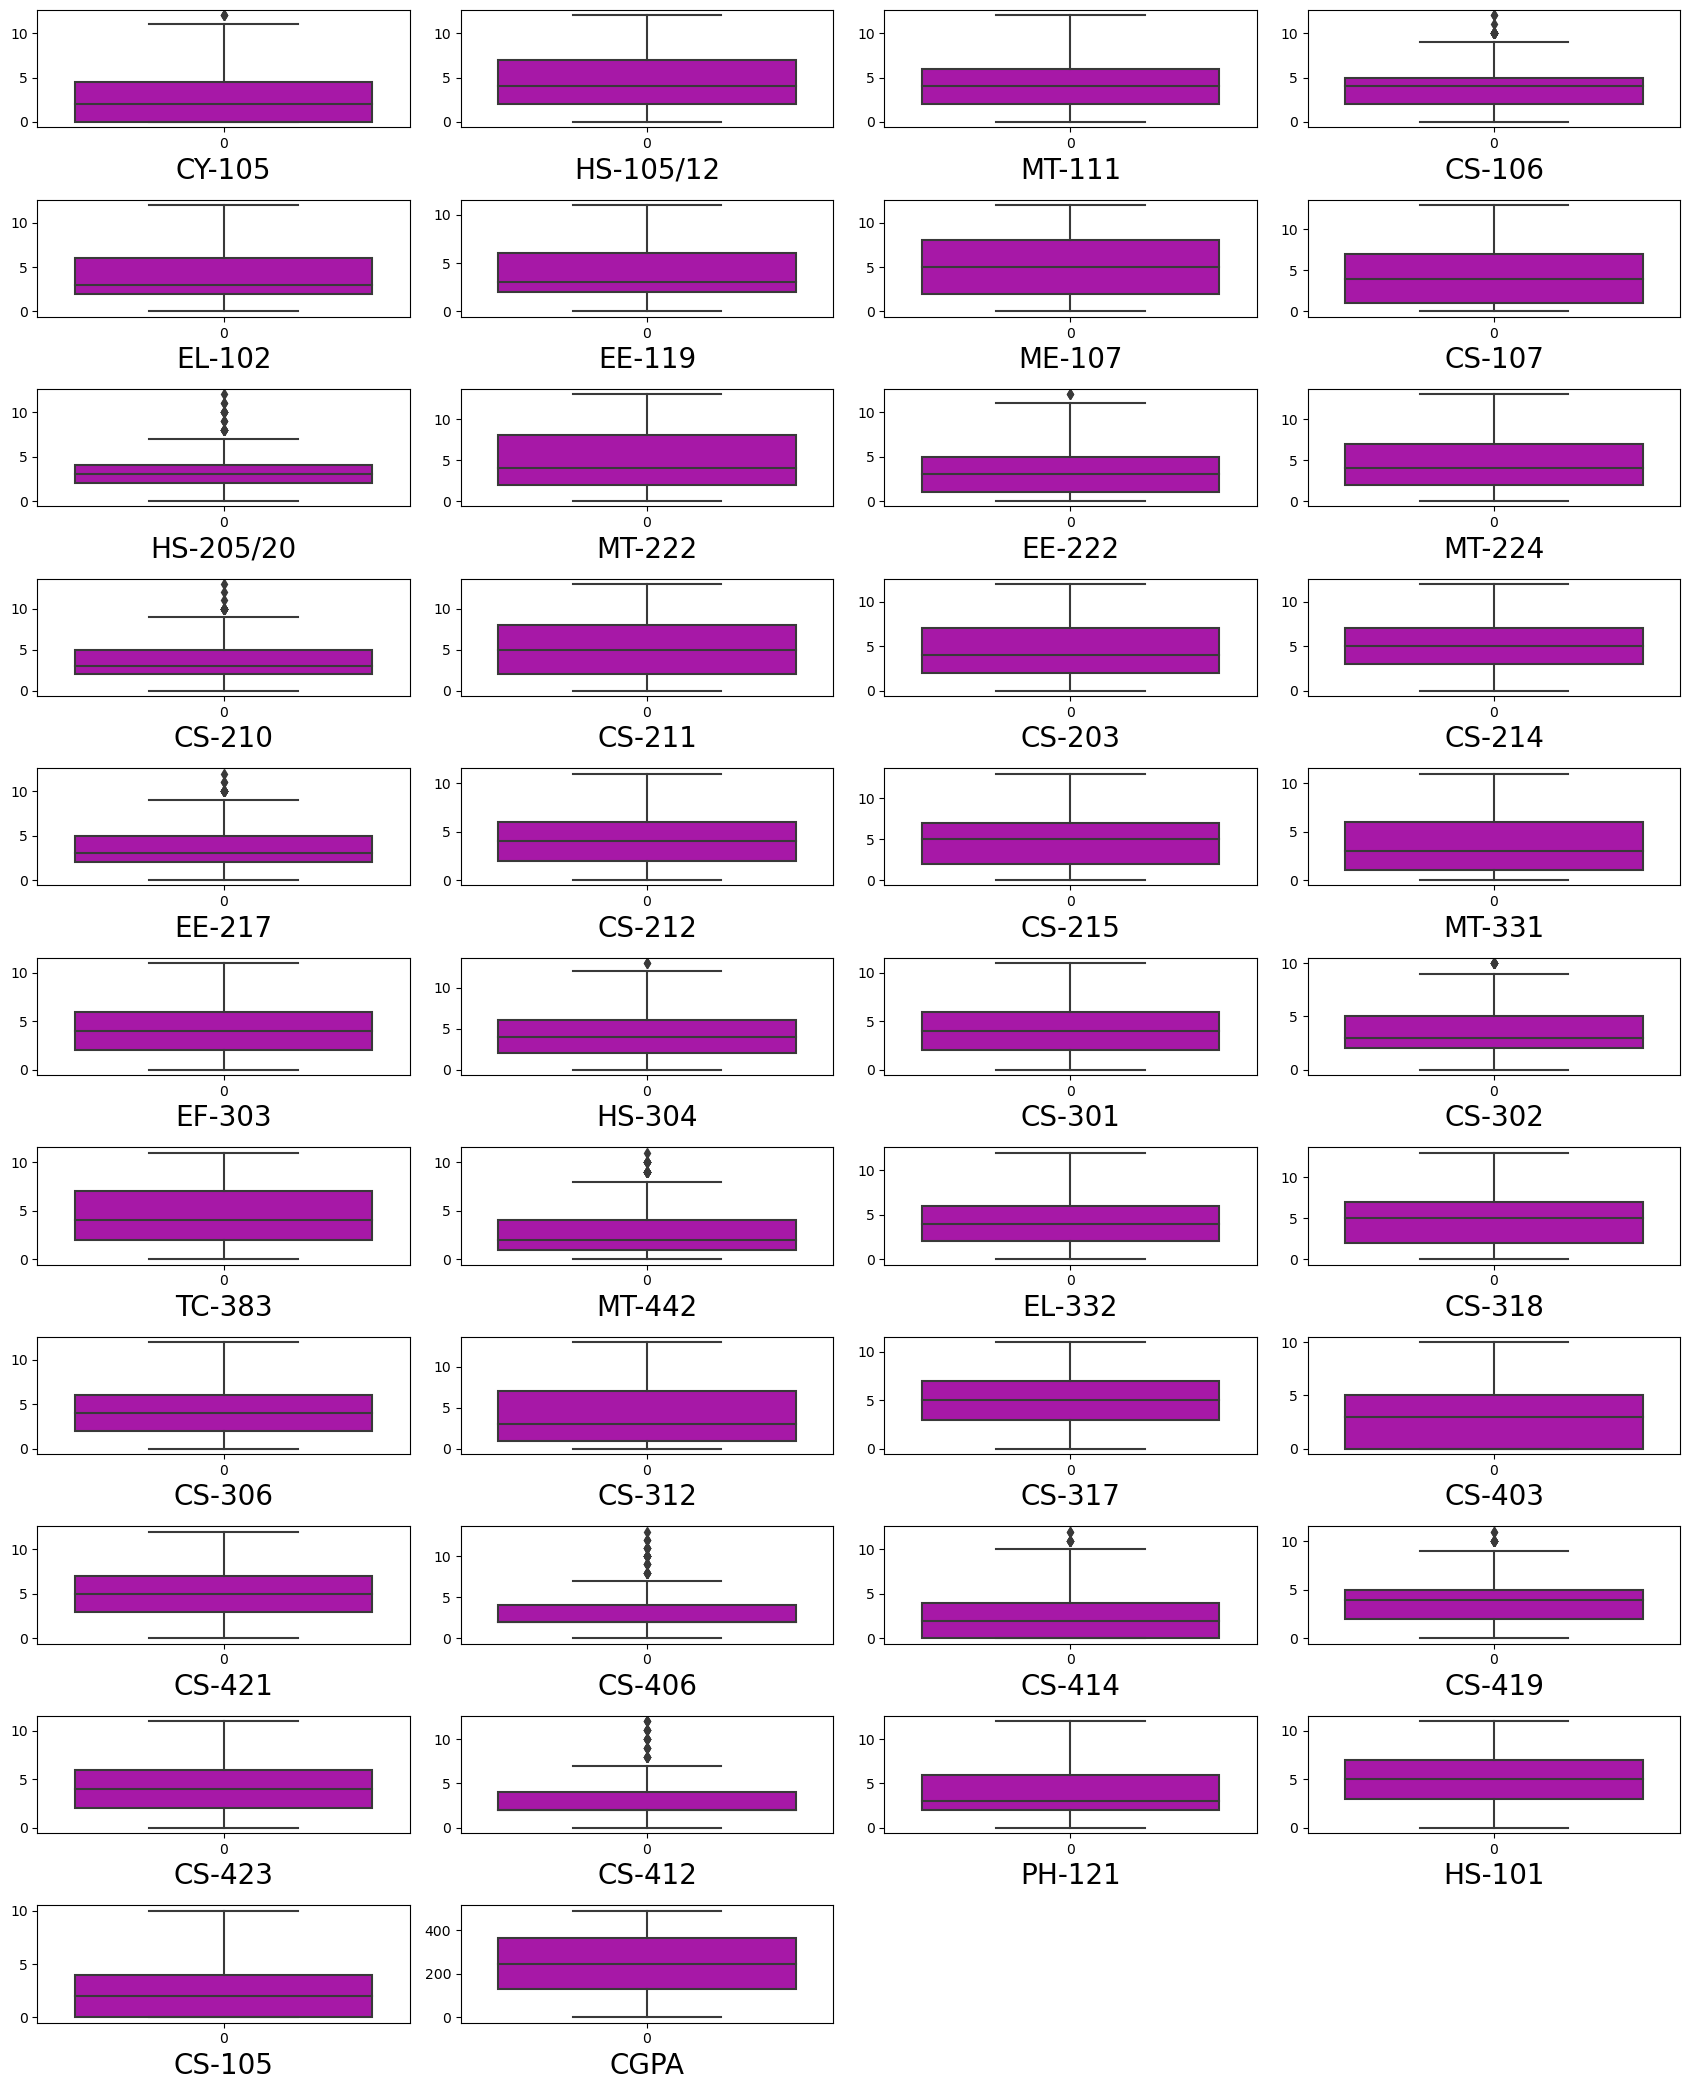

In [24]:
plt.figure(figsize=(17,21), facecolor='white')
plotnumber=1
for col in df_new:
    if plotnumber<=42:
        ax=plt.subplot(11,4,plotnumber)
        sns.boxplot(df_new[col],color='m')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()    
plt.show()    

# Removing outliers

In [25]:
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(df_new))
z

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,PH-121,HS-101,CS-105,CGPA
0,1.722261,0.549869,1.374222,1.790004,1.333963,0.419492,1.024565,1.206841,0.435944,1.299432,...,0.958939,0.399094,0.960095,1.740513,0.346121,0.450178,0.400402,1.770900,2.657832,1.260130
1,2.397448,1.488043,0.369509,1.790004,1.307365,2.302589,1.342687,0.020965,1.712477,0.086558,...,1.325686,0.399094,1.042149,0.900418,0.727983,0.021043,1.242052,1.411559,1.173242,1.432481
2,0.978490,0.237145,0.034605,0.322008,0.013299,0.710366,0.884168,0.285986,0.415078,1.429535,...,0.225444,1.210063,0.960095,1.619869,0.704156,1.308446,1.242052,0.744483,1.053643,1.159957
3,2.397448,1.488043,1.709126,2.157003,1.333963,1.925970,0.706443,1.513792,0.010433,1.602651,...,0.958939,0.817361,0.241251,1.320466,1.086017,1.695494,1.714365,0.692879,0.311348,1.540200
4,0.303302,0.075580,1.305012,0.778989,0.013299,1.463605,0.884168,0.592938,1.266100,1.429535,...,0.141304,0.399094,0.960095,0.779774,0.704156,1.308446,0.585070,1.103823,1.053643,0.843981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.978490,0.701029,0.970108,0.778989,0.647033,1.086986,0.247924,0.941820,1.266100,1.126316,...,1.975041,1.210063,0.641700,0.060322,0.346121,1.308446,0.256579,1.822504,1.053643,1.519021
567,0.978490,1.326478,1.305012,1.512987,0.647033,1.463605,1.520412,0.941820,0.435944,0.692995,...,1.975041,0.399094,0.241251,0.779774,0.727983,0.450178,0.913561,1.822504,1.053643,1.504658
568,0.303302,0.075580,1.305012,1.512987,1.307365,1.463605,0.566046,0.941820,0.861455,0.519879,...,0.508051,1.210063,1.442597,0.060322,0.704156,0.450178,0.256579,1.822504,1.053643,0.872706
569,2.059854,1.326478,1.709126,0.322008,1.333963,0.419492,1.024565,0.941820,1.712477,1.299432,...,0.958939,2.439300,1.442597,0.359726,0.369948,1.266360,1.242052,0.385142,2.657832,1.274493


In [27]:
threshold=3
print(np.where(z>3))

(array([ 60,  60,  60,  91, 137, 143, 281, 281, 288, 340, 340, 352, 352,
       382, 387, 387, 410, 423, 424, 432, 446, 447, 447, 453, 453, 454,
       454, 454, 509, 513, 516, 516, 521, 522, 522, 527, 543, 543, 550,
       550, 557, 560, 563, 570], dtype=int64), array([ 0,  8, 16, 12,  0,  0,  8, 12,  8, 21, 34, 21, 34, 34, 34, 37, 34,
       34, 34, 37, 33, 33, 34, 33, 37, 33, 34, 35, 33, 37, 33, 37, 33, 33,
       37, 37, 33, 37, 34, 37, 34, 34, 35, 33], dtype=int64))


In [28]:
z.iloc[60,0]

3.072635851531242

In [29]:
df1=df_new[(z<3).all(axis=1)]
df1

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,PH-121,HS-101,CS-105,CGPA
0,8,6,8,9,8,5,8,8,4,9,...,8,2,0,8,3,2,5,10,10,72
1,10,9,5,9,0,10,9,4,7,5,...,9,2,5,6,6,3,0,9,6,48
2,0,5,4,5,4,2,2,5,2,0,...,6,0,0,0,2,0,0,3,0,409
3,10,9,9,10,8,9,7,9,3,10,...,8,5,3,7,7,7,9,7,2,33
4,2,4,0,2,4,0,2,6,0,0,...,5,2,0,2,2,0,2,2,0,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,9,8,2,9,2,2,2,0,2,2,...,3,2,0,2,2,2,11,11,10,0
566,0,2,1,2,2,1,4,1,0,1,...,0,0,4,4,3,0,3,0,0,459
567,0,0,0,0,2,0,0,1,4,7,...,0,2,3,2,6,2,1,0,0,457
568,2,4,0,0,0,0,3,1,5,3,...,4,0,6,4,2,2,3,0,0,369


In [31]:
print('Old Data',df_new.shape)
print('New data',df1.shape)
print('Data loss in percentage:',((df_new.shape[0]-df1.shape[0])/df_new.shape[0])*100)

Old Data (571, 42)
New data (541, 42)
Data loss in percentage: 5.253940455341506


In [32]:
df1.corr()

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,PH-121,HS-101,CS-105,CGPA
CY-105,1.000000,0.495521,0.517536,0.369741,0.406682,0.474044,0.455907,0.445044,0.225850,0.484934,...,0.406101,0.174614,-0.010518,0.492370,0.165853,0.133717,0.532754,0.317140,0.570823,-0.647852
HS-105/12,0.495521,1.000000,0.479910,0.486444,0.332440,0.369681,0.287129,0.520019,0.150652,0.480375,...,0.445343,0.152278,0.109947,0.490298,0.238229,0.174744,0.484219,0.480799,0.468722,-0.607482
MT-111,0.517536,0.479910,1.000000,0.507372,0.528219,0.396637,0.452489,0.447078,0.307683,0.498876,...,0.541703,0.319285,0.207122,0.539257,0.453000,0.297977,0.425745,0.412394,0.352982,-0.729646
CS-106,0.369741,0.486444,0.507372,1.000000,0.324659,0.260648,0.282228,0.414449,0.117645,0.385260,...,0.434471,0.110115,0.093050,0.445939,0.345595,0.196485,0.285921,0.330937,0.298328,-0.544478
EL-102,0.406682,0.332440,0.528219,0.324659,1.000000,0.436365,0.444663,0.406669,0.352007,0.447482,...,0.380439,0.249477,0.233270,0.409674,0.402882,0.291571,0.388061,0.325733,0.313112,-0.629203
EE-119,0.474044,0.369681,0.396637,0.260648,0.436365,1.000000,0.553593,0.372081,0.322461,0.466078,...,0.349669,0.270451,0.147230,0.464924,0.227403,0.339425,0.573762,0.301124,0.490497,-0.626937
ME-107,0.455907,0.287129,0.452489,0.282228,0.444663,0.553593,1.000000,0.308895,0.365280,0.489036,...,0.344354,0.313549,0.115513,0.457822,0.231479,0.317834,0.512167,0.321726,0.422829,-0.665138
CS-107,0.445044,0.520019,0.447078,0.414449,0.406669,0.372081,0.308895,1.000000,0.091012,0.447224,...,0.361661,0.326505,0.193099,0.335488,0.225197,0.273661,0.444402,0.486513,0.484446,-0.588869
HS-205/20,0.225850,0.150652,0.307683,0.117645,0.352007,0.322461,0.365280,0.091012,1.000000,0.272124,...,0.208933,0.320599,0.370773,0.311434,0.348286,0.316841,0.264662,0.146180,0.138004,-0.444538
MT-222,0.484934,0.480375,0.498876,0.385260,0.447482,0.466078,0.489036,0.447224,0.272124,1.000000,...,0.407953,0.291563,0.194180,0.472683,0.318509,0.352862,0.545567,0.390707,0.469111,-0.688700


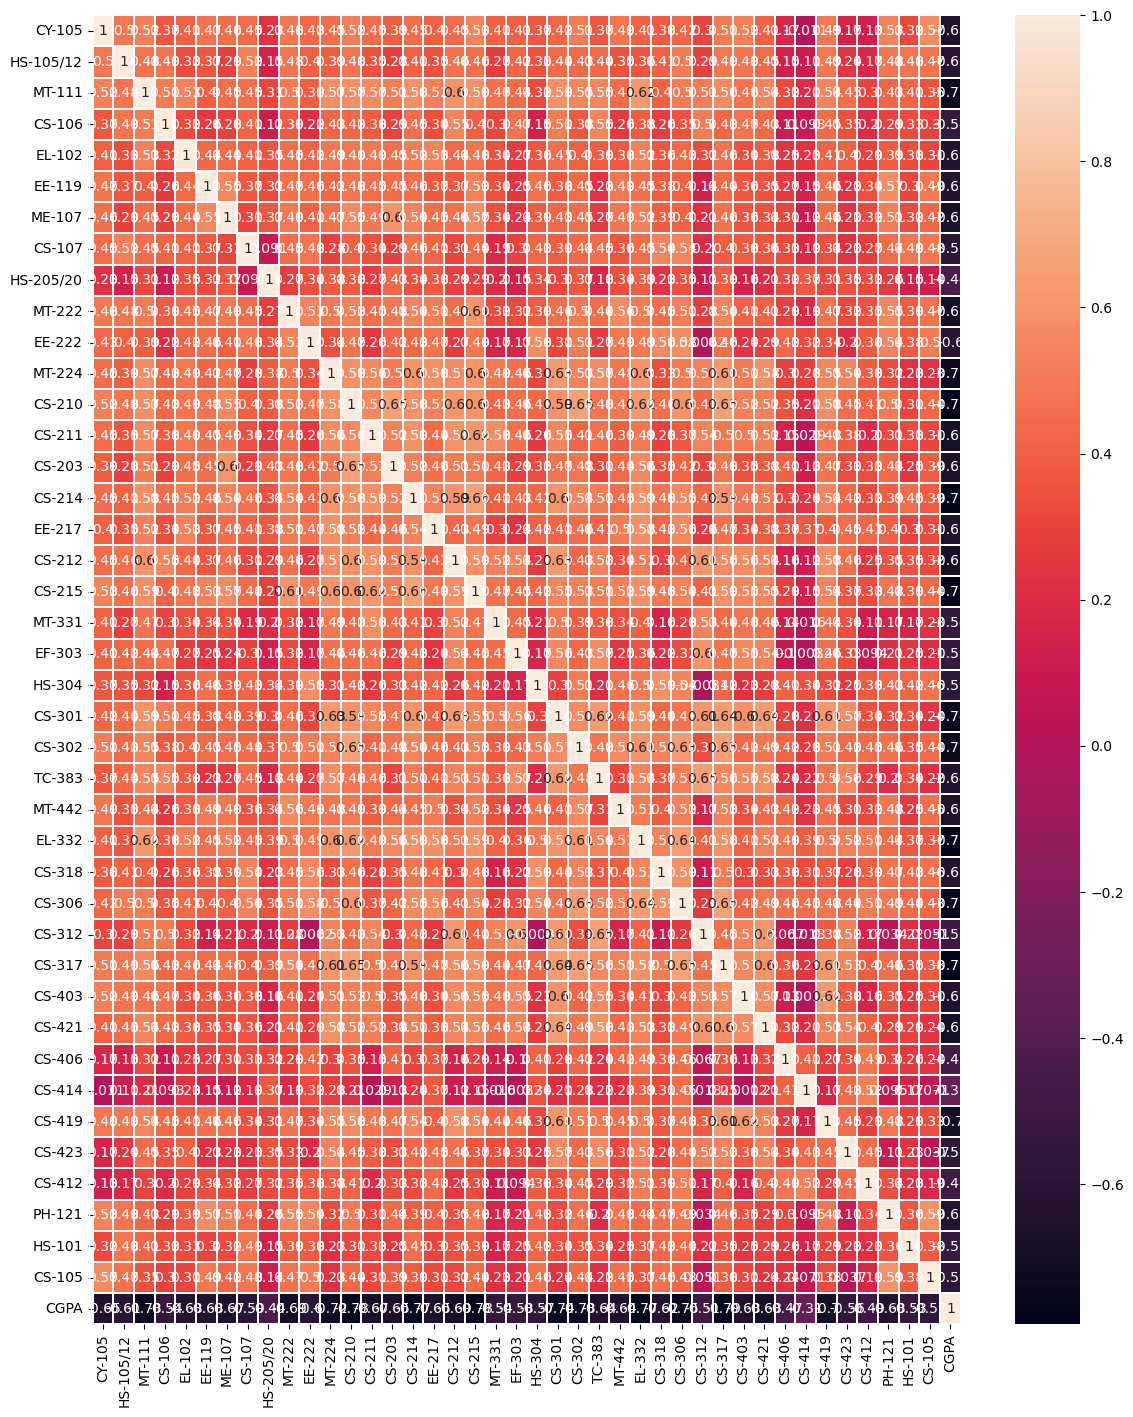

In [33]:
#graphical representation of above correlated values
plt.figure(figsize=(14,17))
sns.heatmap(df1.corr(),annot=True,linewidth=0.1,fmt='.2g')
plt.show()

# Seperating the data

In [34]:
x=df1.drop('CGPA',axis=1)
y=df1['CGPA']

# Scaling using standard scaler method

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,PH-121,HS-101,CS-105
0,1.836342,0.608386,1.477208,1.856543,1.420063,0.481736,1.083954,1.314978,0.499602,1.342016,...,1.528151,1.064593,-0.349237,-1.032765,1.823654,-0.318241,-0.420014,0.458648,1.848927,2.789025
1,2.541174,1.567968,0.438876,1.856543,-1.287440,2.415111,1.406873,0.040633,1.824528,0.115613,...,0.857104,1.448301,-0.349237,1.383869,0.961244,0.780706,0.086061,-1.217896,1.482528,1.257962
2,-0.982987,0.288525,0.092765,0.363027,0.066311,-0.678290,-0.853554,0.359219,-0.383682,-1.417391,...,-1.156037,0.297178,-1.296290,-1.032765,-1.625985,-0.684557,-1.432165,-1.217896,-0.715867,-1.038632
3,2.541174,1.567968,1.823319,2.229923,1.420063,2.028436,0.761036,1.633564,0.057960,1.648616,...,2.199198,1.064593,1.071343,0.417215,1.392449,1.147022,2.110362,1.799883,0.749730,-0.273101
4,-0.278155,-0.031336,-1.291678,-0.757111,0.066311,-1.451640,-0.853554,0.677805,-1.266965,-1.417391,...,0.186057,-0.086529,-0.349237,-1.032765,-0.763575,-0.684557,-1.432165,-0.547278,-1.082266,-1.038632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,2.188758,1.248107,-0.599456,1.856543,-0.610565,-0.678290,-0.853554,-1.233712,-0.383682,-0.804189,...,-1.156037,-0.853944,-0.349237,-1.032765,-0.763575,-0.684557,-0.420014,2.470500,2.215327,2.789025
537,-0.982987,-0.671057,-0.945567,-0.757111,-0.610565,-1.064965,-0.207718,-0.915125,-1.266965,-1.110790,...,-1.156037,-2.005066,-1.296290,0.900542,0.098834,-0.318241,-1.432165,-0.211970,-1.815064,-1.038632
538,-0.982987,-1.310778,-1.291678,-1.503869,-0.610565,-1.451640,-1.499391,-0.915125,0.499602,0.728814,...,-1.156037,-2.005066,-0.349237,0.417215,-0.763575,0.780706,-0.420014,-0.882587,-1.815064,-1.038632
539,-0.278155,-0.031336,-1.291678,-1.503869,-1.287440,-1.451640,-0.530636,-0.915125,0.941244,-0.497589,...,-1.156037,-0.470237,-1.296290,1.867196,0.098834,-0.684557,-0.420014,-0.211970,-1.815064,-1.038632


# Model building

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge

In [38]:
maxAccu=0
maxRS=0
for i in range(1,220):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum r2_score is:',maxAccu, 'at random state:',maxRS)

Maximum r2_score is: 0.9829345542143988 at random state: 213


In [39]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=maxRS)

In [40]:
model=[RandomForestRegressor(),
        DecisionTreeRegressor(),
        LinearRegression(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
        Lasso(),
        Ridge()]  

In [41]:
for m in model:
    m.fit(x_train,y_train)
    pred_m=m.predict(x_test)
    pred_train=m.predict(x_train)
    print('Model prediction for :',m)
    print('r2 score:',r2_score(y_test, pred_m))
    print('r2 score on training data:',r2_score(y_train, pred_train))
    print('mean absolute error :',mean_absolute_error(y_test, pred_m))
    print('mean squared error :',mean_squared_error(y_test, pred_m))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test, pred_m)))
    print('\n')

Model prediction for : RandomForestRegressor()
r2 score: 0.9668876509518451
r2 score on training data: 0.9887267841903716
mean absolute error : 19.43926380368098
mean squared error : 598.2020049079756
root mean squared error : 24.458168470021945


Model prediction for : DecisionTreeRegressor()
r2 score: 0.8123668368222232
r2 score on training data: 1.0
mean absolute error : 43.23312883435583
mean squared error : 3389.7484662576685
root mean squared error : 58.22154640901999


Model prediction for : LinearRegression()
r2 score: 0.9829345542143988
r2 score on training data: 0.9573716836732564
mean absolute error : 14.373219872462768
mean squared error : 308.30140950582484
root mean squared error : 17.55851387520666


Model prediction for : AdaBoostRegressor()
r2 score: 0.9209446851347356
r2 score on training data: 0.9373600818541518
mean absolute error : 31.845421418223026
mean squared error : 1428.199726399891
root mean squared error : 37.79152982349208


Model prediction for : Gradient

In this Ridge is giving best r2 score

# Cross validation to check actual performance of these above models

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('Cross validation score for :',m)
    print('Model score :',score)
    print('mean score :',score.mean())
    print('difference between r2 score and Cross validation score :',r2_score(y_test, pred_m)-score.mean())
    print('\n')

Cross validation score for : RandomForestRegressor()
Model score : [0.92187806 0.95073526 0.95557687 0.93524768 0.90438761]
mean score : 0.9335650959853716
difference between r2 score and Cross validation score : 0.049484595556231525


Cross validation score for : DecisionTreeRegressor()
Model score : [0.7838447  0.78006174 0.81293802 0.75625457 0.81474275]
mean score : 0.789568353995483
difference between r2 score and Cross validation score : 0.19348133754612018


Cross validation score for : LinearRegression()
Model score : [0.92694972 0.97666119 0.96674377 0.97236944 0.91578373]
mean score : 0.9517015696715964
difference between r2 score and Cross validation score : 0.031348121870006795


Cross validation score for : AdaBoostRegressor()
Model score : [0.89195595 0.9057744  0.91951473 0.90201231 0.83644855]
mean score : 0.8911411889660241
difference between r2 score and Cross validation score : 0.09190850257557903


Cross validation score for : GradientBoostingRegressor()
Model score

Ridge is best model since the difference between accuracy score and Cross validation score is lowest among all

# Hyper Parameter tuning

In [44]:
from sklearn.model_selection import GridSearchCV 

In [46]:
parameters={'alpha':[0,2.0,1.0],'fit_intercept':[True,False],
            'max_iter':[100,200,400,600],'solver':['auto','svd','lsqr']}
gcvs=GridSearchCV(Ridge(),parameters,cv=5)
gcvs.fit(x_train,y_train)
gcvs.best_params_

{'alpha': 2.0, 'fit_intercept': True, 'max_iter': 100, 'solver': 'auto'}

# Final Model

In [48]:
model_test=Ridge(alpha=2.0,fit_intercept=True,max_iter=100,solver='auto')
model_test.fit(x_train,y_train)
pred_g=model_test.predict(x_test)
print('r2 score:',r2_score(y_test, pred_g))
print('mean absolute error :',mean_absolute_error(y_test, pred_g))
print('mean squared error :',mean_squared_error(y_test, pred_g))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test, pred_g)))

r2 score: 0.98316057293696
mean absolute error : 14.2982868906027
mean squared error : 304.21819412336424
root mean squared error : 17.441851797425763


# Saving the model

In [49]:
import joblib
joblib.dump(model_test,'student_grade.pkl')

['student_grade.pkl']

# Predicting the same model for future use

In [53]:
prediction=model_test.predict(x_test)
a=np.array(y_test)
df2=pd.DataFrame()
df2['predicted']=prediction
df2['original']=a
df2

,predicted,original
0,350.287246,370
1,242.421061,216
2,504.719585,483
3,356.423107,373
4,108.274647,97
...,...,...
158,143.918491,103
159,202.824213,209
160,418.916963,429
161,465.755319,489
